In [1]:
import pandas as pd
from google.colab import files
import pandas as pd
from scipy.io import arff
import io

In [2]:
uploaded = files.upload()

Saving phpZrCzJR.arff to phpZrCzJR.arff


In [3]:
uploaded_file = list(uploaded.values())[0]
decoded_file_content = uploaded_file.decode('utf-8')
data, meta = arff.loadarff(io.StringIO(decoded_file_content))
df = pd.DataFrame(data)

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,Target
0,46.0,40.0,119.0,139.0,42.0,30.0,135.0,157.0,42.0,30.0,...,113.0,50.0,46.0,111.0,116.0,44.0,31.0,131.0,142.0,Anomaly
1,47.0,37.0,119.0,133.0,44.0,34.0,124.0,143.0,44.0,34.0,...,85.0,50.0,39.0,118.0,132.0,43.0,29.0,133.0,143.0,Anomaly
2,80.0,95.0,100.0,74.0,64.0,64.0,104.0,96.0,46.0,36.0,...,81.0,82.0,91.0,92.0,78.0,78.0,83.0,96.0,74.0,Anomaly
3,56.0,51.0,72.0,60.0,59.0,54.0,72.0,60.0,59.0,51.0,...,50.0,57.0,55.0,74.0,61.0,57.0,55.0,78.0,65.0,Anomaly
4,44.0,34.0,129.0,140.0,44.0,34.0,124.0,136.0,44.0,34.0,...,139.0,43.0,31.0,128.0,135.0,43.0,29.0,128.0,132.0,Anomaly


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (5100, 37)


In [5]:
print("\nData types:\n", df.dtypes)


Data types:
 V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
V31       float64
V32       float64
V33       float64
V34       float64
V35       float64
V36       float64
Target     object
dtype: object


In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
Target    0
dtype: int64


In [7]:
print("\nTarget class distribution:\n", df['Target'].value_counts())


Target class distribution:
 Target
Normal     5025
Anomaly      75
Name: count, dtype: int64


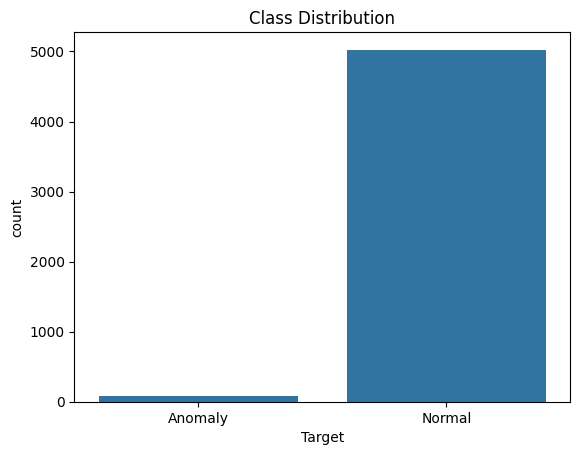

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Target', data=df)
plt.title('Class Distribution')
plt.show()

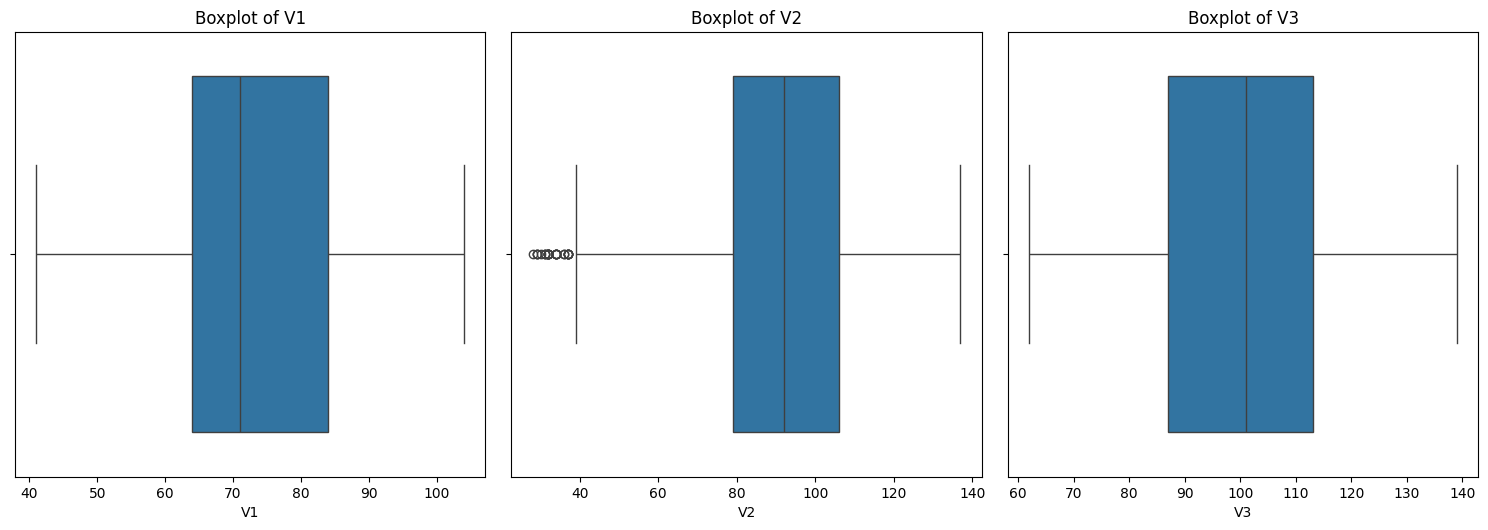

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:3], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

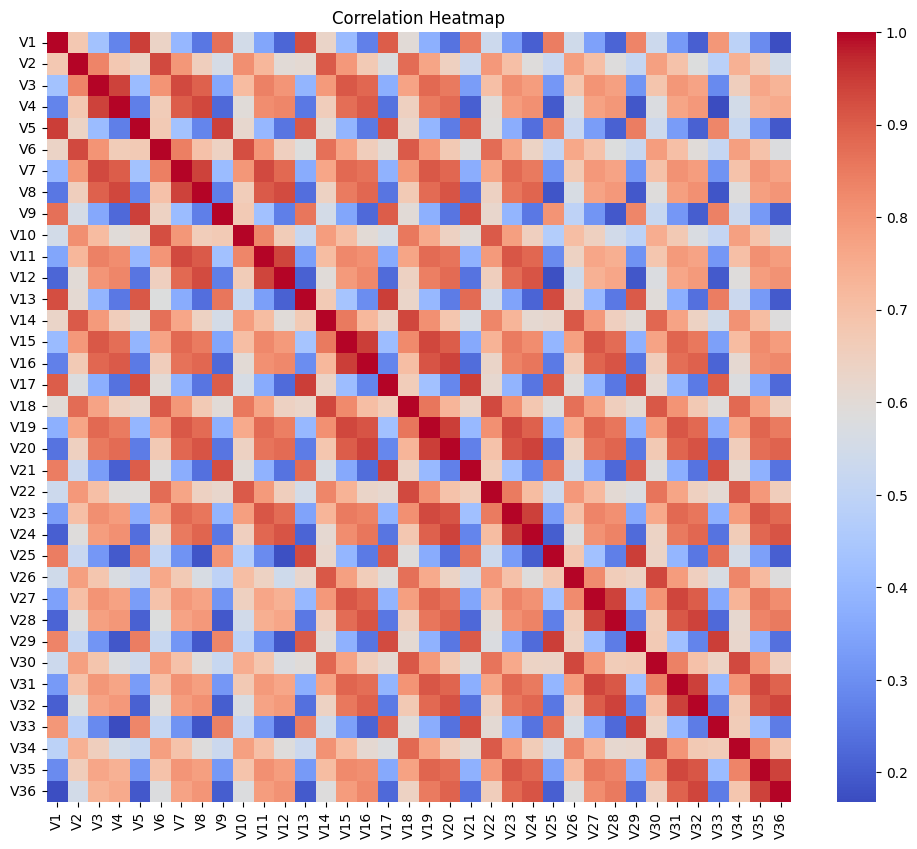

In [10]:
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_features = df.select_dtypes(include=['number']).columns
numerical_data = df[numerical_features]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical_data)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df['encoded_column'] = label_encoder.fit_transform(data['Target'])
data_onehot = pd.get_dummies(data['Target'])

In [13]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

selector = VarianceThreshold(threshold=0.1)
data_selected = selector.fit_transform(numerical_data)

X = df[numerical_features]
y = df['Target']

model = RandomForestClassifier()
model.fit(X, y)
important_features = model.feature_importances_

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(numerical_data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numerical_data)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
df_data = pd.DataFrame(data)

numerical_features = df_data.select_dtypes(include=['number']).columns
numerical_data = df_data[numerical_features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Step 2: Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# Step 3: Output shape and explained variance
print("Original shape:", data.shape)
print("Transformed shape:", pca_data.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original shape: (5100,)
Transformed shape: (5100, 6)
Explained variance ratio: [0.65973107 0.18920029 0.03657183 0.03050837 0.02597611 0.00877528]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, df['Target'], test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (4080, 6)
Testing shape: (1020, 6)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9931372549019608
Classification Report:
               precision    recall  f1-score   support

     Anomaly       0.87      0.72      0.79        18
      Normal       1.00      1.00      1.00      1002

    accuracy                           0.99      1020
   macro avg       0.93      0.86      0.89      1020
weighted avg       0.99      0.99      0.99      1020

Confusion Matrix:
 [[  13    5]
 [   2 1000]]


In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9938725490196079
Tuned Random Forest Accuracy: 0.9921568627450981
              precision    recall  f1-score   support

     Anomaly       0.81      0.72      0.76        18
      Normal       1.00      1.00      1.00      1002

    accuracy                           0.99      1020
   macro avg       0.90      0.86      0.88      1020
weighted avg       0.99      0.99      0.99      1020



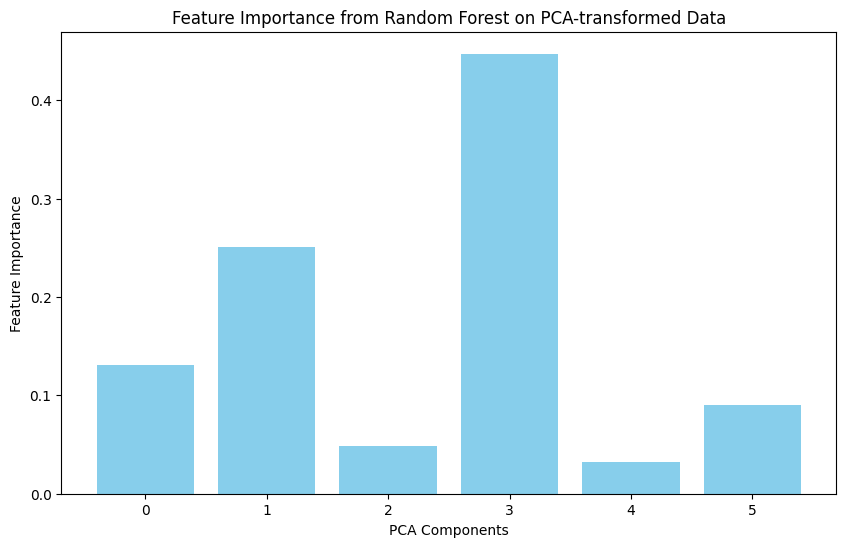

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from best model
importances = best_model.feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, color='skyblue')
plt.xlabel("PCA Components")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Random Forest on PCA-transformed Data")
plt.show()

In [24]:
import joblib

# Save the best Random Forest model
joblib.dump(best_model, "random_forest_model.pkl")

# Optionally save the scaler and PCA object too
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")

['pca.pkl']

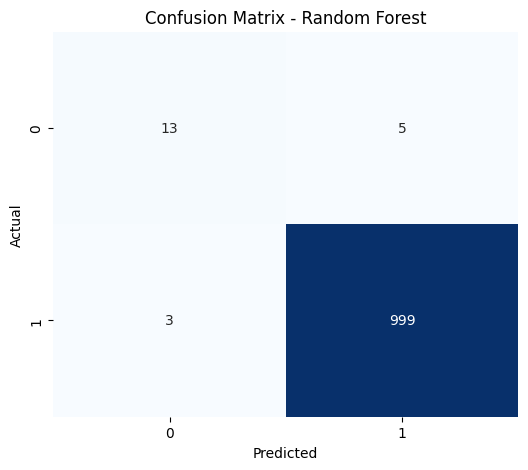

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()